# 문제
여름 농어 철로 농어 주문이 크게 늘어자나 Jake Market은 업계 최초로 농어를 무게 단위로 판매하려 한다.   
농어를 마리당 가격으로 판매했을 때 기대보다 볼품없는 농어를 받은 고객이 항의하는 일이 발생했기 때문이다.   
무게 단위로 가격을 책정하면 고객들도 합리적이라고 생각할 것 같다.   
그런데 공급처에서 생선 무게를 잘못 측정해서 보냈다.   
이 문제를 해결할 수 있을까?

# k-최근접 이웃 회귀
지도 학습 알고리즘은 크게 **분류**와 **회귀(regression)**로 나뉜다.   
분류는 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 것이다.   
회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다.   
   
예를 들면 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제이다.   
또 여기에서 주어진 문제처럼 농어의 무게를 예측하는 것도 회귀가 된다.   
회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.   
   
기존에 사용했던 **k-최근접 이웃 분류** 알고리즘은 간단하다.   
예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.   
그다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.   
   
**k-최근접 이웃 회귀**도 간단하다.   
분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.   
하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다.   
이웃 샘플의 수치를 사용해 새로운 샘플 X의 타깃을 예측하는 간단한 방법은 뭐가 있을까?   
바로 이 수치들의 평균을 구하면 된다.   
예를 들어, k=3이고, 이웃한 샘플의 타깃값이 각각 100, 80, 60이고 이를 평균하면 샘플 X의 예측 타깃값은 80이 된다.

# 데이터 준비
먼저 훈련 데이터를 준비해 본다.   
농어의 길이만 있어도 무게를 잘 예측할 수 있을 것 같다.   
그럼 농어의 길이가 **특성**이고, 무게가 **타깃**이 된다.   
기존에는 파이썬 리스트에서 넘파이 배열로 변환했지만, 여기서는 바로 넘파이 배열에서 만든다.

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

먼저 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려 본다.   
하나의 특성을 사용하기 때문에 특성 데이터를 x축에 놓고, 타깃 데이터를 y축에 놓는다.   
맷플롯립을 임포트하고 scatter() 함수를 사용하여 산점도를 그린다.

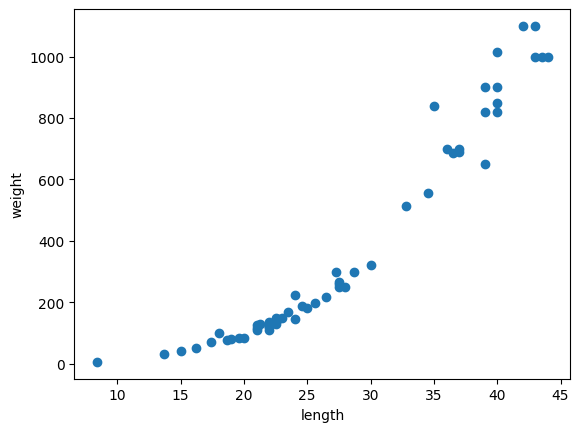

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 커김에 따라 무게도 늘어난다.   
그래프를 그려보지 않아도 직관적으로 알 수 있는 현상이다.   
농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나눈다.

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.   
perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다.   
이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꾸어야 한다.   
   
파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다.   
예를 들어 [1, 2, 3]의 크기는 (3, )이다.   
이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가했다.   
이렇게 하면 배열의 크기가 (3, 1)이 된다.   
배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다.   
   
이전 도미와 빙어 예시에서는 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었다.   
이번 예제에서는 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다.   
복잡하게 느껴지지만, 다행히 넘파이 배열은 크기를 바꿀 수 있는 reshape() 메서드를 제공한다.   
예를 들어 (4, ) 배열을 (2, 2) 크기로 바꿔 본다.

In [5]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


### 지정한 크기와 원본 배열의 원소 개수가 달라도 될까?
reshape() 메서드는 크기가 바뀐 새로운 배열을 반환할 때 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러가 발생한다.   
예를 들어 (4, ) 크기의 배열을 (2, 3)으로 바꾸려고 하면 에러가 발생한다.   
원본 배열의 원소는 4개인데, 2 x 3 = 6개로 바꾸려고 하기 때문이다.

reshape() 메서드를 사용하는 방법은 어렵지 않다.   
이제 이 메서드를 사용해 train_input과 test_input을 2차원 배열로 바꾼다.   
train_input의 크기는 (42, )이다.   
이를 2차원 배열인 (42, 1)로 바꾸려면 train_input.reshape(42, 1)과 같이 사용한다.   
넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공하는데, 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.   
예를 들어 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 하려면 train_input.reshape(-1, 1)처럼 사용한다.

In [7]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


2차원 배열로 성공적으로 변환했다.   
reshape(-1, 1)과 같이 사용하면 배열의 전체 원소의 개수를 매번 외우지 않아도 되므로 편리하다.   
이제 준비한 훈련 세트를 활용하여 k-최근접 이웃 알고리즘을 훈련시켜 본다.

# $$결정계수(R^2)$$
사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 **KNeighborsRegressor**이다.   
이 클래스의 사용법은 **KNeighborsClassifier**와 매우 비슷하다.   
객체를 생성하고 fit() 메서드로 회귀 모델을 훈련한다.

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다
knr.fit(train_input, train_target)

KNeighborsRegressor()

이제 테스트 세트의 점수를 확인해 본다.

In [10]:
print(knr.score(test_input, test_target))

0.992809406101064


아주 좋은 점수가 나왔다.   
그런데 이 점수는 무엇일까?   
   
분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다.   
정확도라고 불렸다.   
간단히 말해 정답을 맞힌 개수의 비율이다.   
회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다.   
예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.   
   
회귀의 경우에는 조금 다른 값으로 평가하는데, 이 점수를 **결정계수(coefficient of determination)**라고 부른다.   
또는 간단히 $$R^2$$라고도 부른다.   
이름이 조금 어렵지만 계산 방식은 간단하다.   
이 값은 다음과 같은 식으로 계산된다.   
$$R^2 = 1 - { (타깃 - 예측)^2의 합 \over (타깃 - 평균)^2의 합 }$$   
각 샘플의 타깃과 예측의 값의 차이를 제곱하여 더한다.   
그다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.   
만약 타깃의 평균 정도를 예측하는 수준이라면(즉 분자와 분모가 비슷해지는 상황이라면) 값은 0에 가까워지고, 예측이 타깃에 아주 가까워지면(분자가 0에 가까워지기 때문에) 1에 가까운 값이 된다.

0.99면 아주 좋은 값이다.   
하지만 정확도처럼 $$R^2$$가 직감적으로 얼마나 좋은지 이해하기는 어렵다.   
대신 다른 값을 계산해 본다.   
**타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋다.**   
사이킷런은 sklearn.metrics 패키지 아래 여러 가지 측정 도구를 제공한다.   
이 중에서 **mean_absolute_error**는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [11]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.   
지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다.   
그런데 훈련 세트를 사용해 평가해 보면 어떨까?   
즉 score() 메서드에 훈련 세트를 전달하여 점수를 출력해 본다.   
이 값은 테스트 세트의 점수와 다를 것이다.

In [12]:
print(knr.score(train_input, train_target))

0.9698823289099254


# 과대적합 vs 과소적합
앞에서 테스트 세트를 사용한 점수와 비교했을 때, 더 낮게 측정되었다.   
   
모델을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어진다.   
이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값 중 어느 것이 높을까?   
보통 훈련 세트의 점수가 조금 더 높게 나온다.   
왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나오는 것이다.   
   
만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 **과대적합(overfitting)** 되었다고 말한다.   
즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다.   
   
반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 어떨까?   
이런 경우를 모델이 훈련 세트에 **과소적합(underfitting)** 되었다고 말한다.   
즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다.   
보통 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

### 왜 과소적합이 일어날까?
이런 현상의 또 다른 원인은 훈련 세트와 테스트 세트의 크기가 매우 작기 때문이다.   
데이터가 작으면 테스트 세트가 훈련 세트의 특징을 따르지 못할 수 있다.

앞서 훈련 세트보다 테스트 세트의 점수가 높으니 **과소적합**이 일어난 것이다.   
이 문제를 어떻게 해결할 수 있을까?   
   
모델을 조금 더 복잡하게 만들면 된다.   
즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다.   
**k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다.   
이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다.**   
여기에서 사이킷런의 k-최근접 이웃 알고리즘의 기본 k값은 5이다.   
이를 3으로 낮추어 본다.

In [13]:
# 이웃의 개수를 3으로 설정한다
knr.n_neighbors = 3

# 모델을 다시 훈련한다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k 값을 줄였더니 훈련 세트의 $$R^2$$ 점수가 높아졌다.   
그럼 이제 테스트 세트의 점수를 확인해 본다.

In [14]:
print(knr.score(test_input, test_target))

0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 것 같다.   
또한 두 점수의 차이가 크지 않으므로 이 모델이 과대적합 된 것 같지도 않다.   
이를 통해 이 모델이 테스트 세트와 추가될 농어 데이터에도 일반화를 잘하리라 예상할 수 있다.